# Visualización de las variables temporales

<hr></hr>

### Librerias

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

<hr></hr>

### Carga de datos

In [3]:
df = pd.read_csv('./iFlowDatos_Limpios.csv')
df.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,VisitaPlanificada,InicioVisitaReal,FinVisitaReal,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-23 12:06:00.000,2024-05-23 14:13:53.000,2024-05-23 14:14:53.000,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,14:13:53,14:14:53
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-10 12:05:00.000,2024-05-10 16:43:00.000,2024-05-10 16:43:00.000,2024-05-10,Friday,12:05:00,2024-05-10,Friday,16:43:00,16:43:00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-30 12:03:00.000,2024-05-30 09:41:36.000,2024-05-30 09:50:08.000,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,09:41:36,09:50:08
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-06-13 12:14:00.000,2024-06-13 13:32:55.000,2024-06-13 13:39:55.000,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,13:32:55,13:39:55
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-06-27 12:27:00.000,2024-06-27 15:36:00.000,2024-06-27 15:36:00.000,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,15:36:00,15:36:00


<hr></hr>

### Visualizaciones

Vamos a crear una columna que nos informe acerca de la demora que llevo cada visita

In [4]:
df['FinVisitaReal']    = pd.to_datetime(df['FinVisitaReal'])
df['InicioVisitaReal'] = pd.to_datetime(df['InicioVisitaReal'])
df['Demora_Inicio_Fin'] = round((df['FinVisitaReal'] - df['InicioVisitaReal']).dt.seconds.div(60),2)

In [5]:
# df['VisitaHora_Fin']    = pd.to_datetime(df['VisitaHora_Fin'])
# df['VisitaHora_Inicio'] = pd.to_datetime(df['VisitaHora_Inicio'])
# df['Demora_Inicio_Fin'] = round((df['VisitaHora_Fin'] - df['VisitaHora_Inicio']).dt.seconds.div(60),2)

In [6]:
df.head(5)

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,InicioVisitaReal,FinVisitaReal,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin
0,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-23 14:13:53,2024-05-23 14:14:53,2024-05-23,Thursday,12:06:00,2024-05-23,Thursday,14:13:53,14:14:53,1.00
1,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-10 16:43:00,2024-05-10 16:43:00,2024-05-10,Friday,12:05:00,2024-05-10,Friday,16:43:00,16:43:00,0.00
2,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-05-30 09:41:36,2024-05-30 09:50:08,2024-05-30,Thursday,12:03:00,2024-05-30,Thursday,09:41:36,09:50:08,8.53
3,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-06-13 13:32:55,2024-06-13 13:39:55,2024-06-13,Thursday,12:14:00,2024-06-13,Thursday,13:32:55,13:39:55,7.00
4,74956,VIDAL 2044,Ciudad Autónoma de Buenos Aires,Comuna 13,Belgrano,901,1401,-34.564779,-58.459956,70,...,2024-06-27 15:36:00,2024-06-27 15:36:00,2024-06-27,Thursday,12:27:00,2024-06-27,Thursday,15:36:00,15:36:00,0.00


In [7]:
# Cuant
len(df[df['Demora_Inicio_Fin'] == 0])

10251

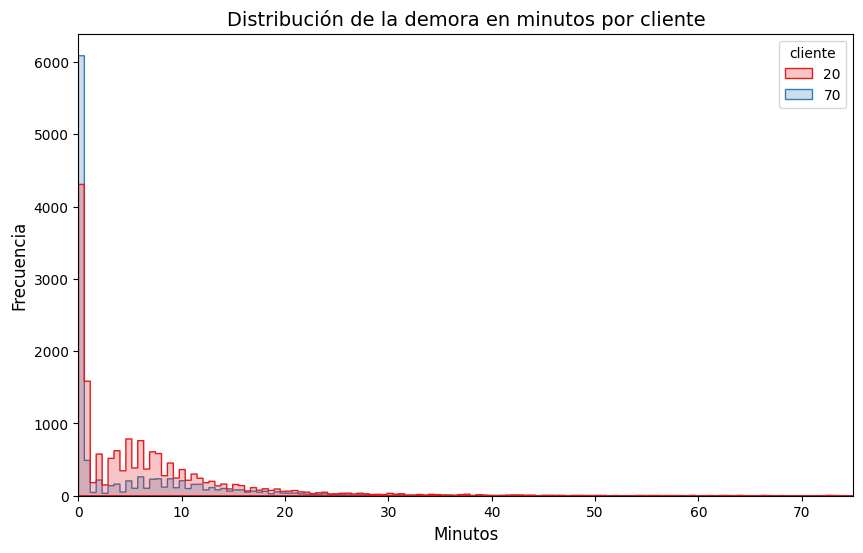

In [8]:
# Grafico de la distribución de la demora de cada cliente
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Demora_Inicio_Fin', hue='cliente', element="step", palette="Set1")

plt.title('Distribución de la demora en minutos por cliente', fontsize=14)
plt.xlabel('Minutos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0,75)
plt.show()

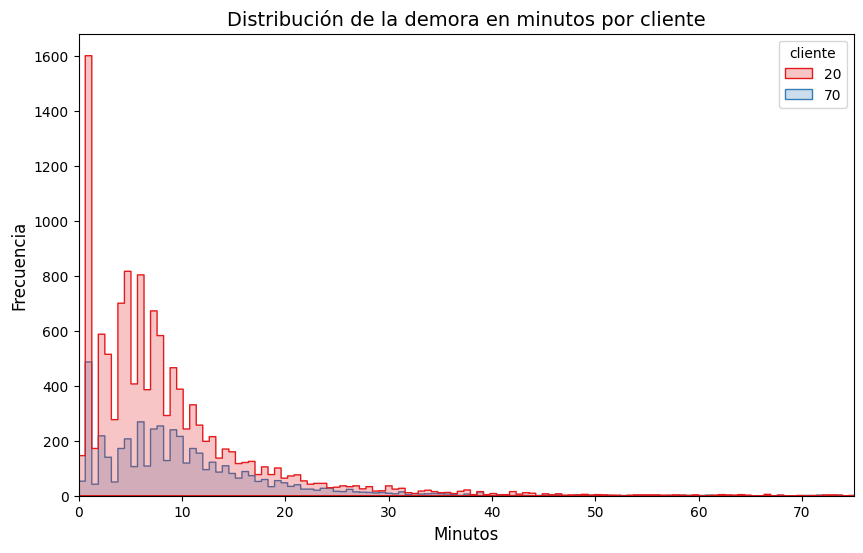

In [9]:
# Grafico de la distribución de la demora de cada cliente
plt.figure(figsize=(10, 6))

sns.histplot(data=df[df['Demora_Inicio_Fin']!=0], x='Demora_Inicio_Fin', hue='cliente', element="step", palette="Set1")

plt.title('Distribución de la demora en minutos por cliente', fontsize=14)
plt.xlabel('Minutos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0,75)
plt.show()

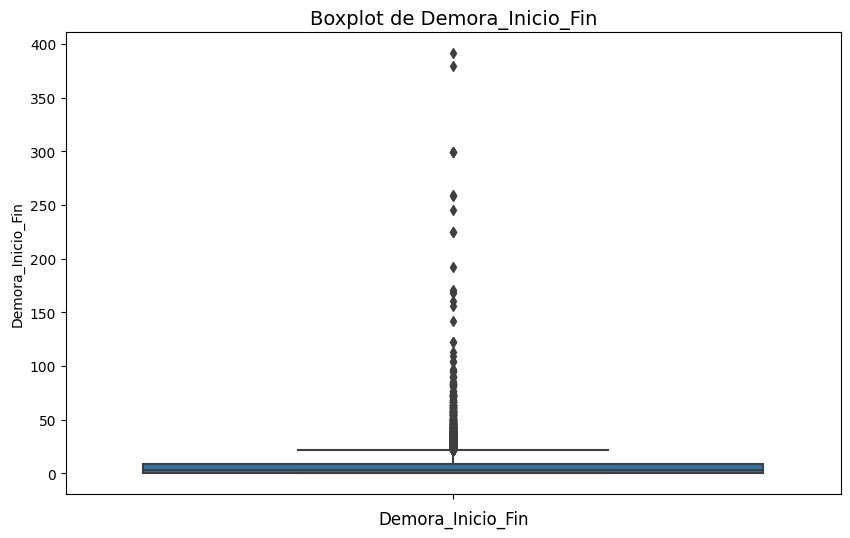

In [10]:
# Boxplot de la distribucion de los minutos de demora (Para ver si hay muchos outliers)
plt.figure(figsize=(10, 6))

sns.boxplot(y='Demora_Inicio_Fin', data=df)

plt.title('Boxplot de Demora_Inicio_Fin', fontsize=14)
plt.xlabel('Demora_Inicio_Fin', fontsize=12)

plt.show()

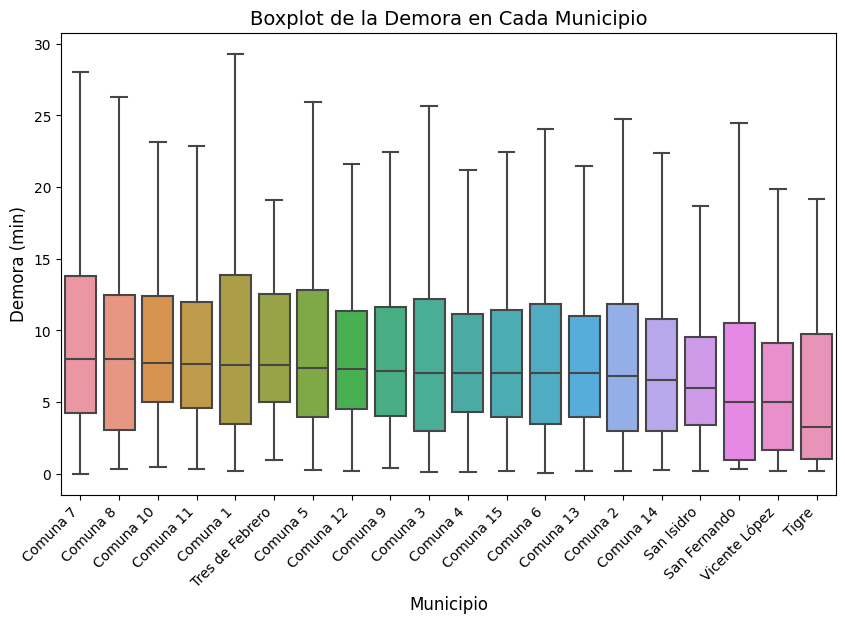

In [11]:
asd = df['municipio'].value_counts()
asd = asd[asd > 50].index.tolist()
aaa = df[(df['municipio'].isin(asd))]
aaa = aaa[(aaa['Demora_Inicio_Fin']!=0)]

plt.figure(figsize=(10, 6))

# Ordenar los municipios por la mediana de 'Demora_Inicio_Fin'
mediana_por_municipio = aaa.groupby('municipio')['Demora_Inicio_Fin'].median().sort_values(ascending=False).index

# Crear el boxplot con los municipios ordenados y sin outliers
sns.boxplot(y='Demora_Inicio_Fin', x='municipio', data=aaa, order=mediana_por_municipio, showfliers=False)

plt.title('Boxplot de la Demora en Cada Municipio', fontsize=14)
plt.xlabel('Municipio', fontsize=12)
plt.ylabel('Demora (min)', fontsize=12)

# Rotar los nombres de los municipios 45 grados
plt.xticks(rotation=45, ha='right')

plt.show()

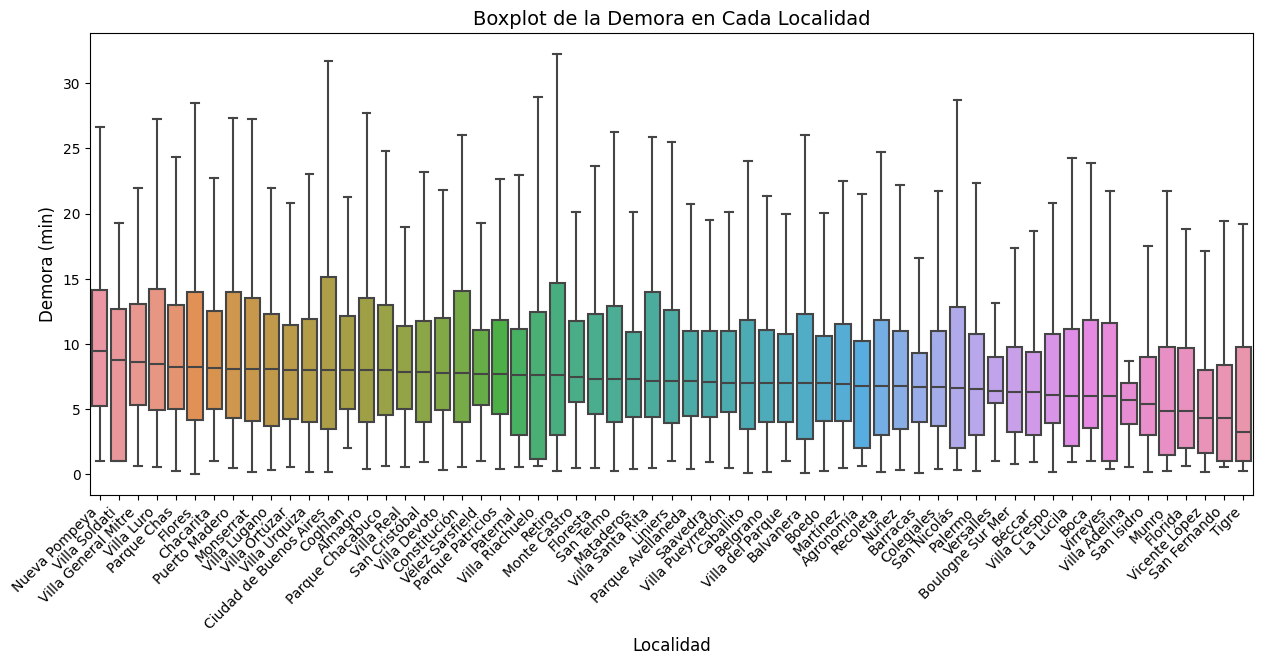

In [12]:
asd = df['localidad'].value_counts()
asd = asd[asd > 50].index.tolist()
aaa = df[(df['localidad'].isin(asd))]
aaa = aaa[(aaa['Demora_Inicio_Fin']!=0)]

plt.figure(figsize=(15, 6))

# Ordenar los municipios por la mediana de 'Demora_Inicio_Fin'
mediana_por_municipio = aaa.groupby('localidad')['Demora_Inicio_Fin'].median().sort_values(ascending=False).index

# Crear el boxplot con los municipios ordenados y sin outliers
sns.boxplot(y='Demora_Inicio_Fin', x='localidad', data=aaa, order=mediana_por_municipio, showfliers=False)

plt.title('Boxplot de la Demora en Cada Localidad', fontsize=14)
plt.xlabel('Localidad', fontsize=12)
plt.ylabel('Demora (min)', fontsize=12)

# Rotar los nombres de los municipios 45 grados
plt.xticks(rotation=45, ha='right')

plt.show()

<hr></hr>

### Análisis de los valores de Demora Extremos

In [13]:
# Vamos a filtrar los outliers que aparecen en el boxplot y veamoslos más detalladamente

Q1  = df['Demora_Inicio_Fin'].quantile(0.25)
Q3  = df['Demora_Inicio_Fin'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Creamos dos dataframes: uno sin los outliers y otro de solo los outliers
df_sin_outliers = df[(df['Demora_Inicio_Fin'] >= limite_inferior) & (df['Demora_Inicio_Fin'] <= limite_superior)]
df_outliers     = df[(df['Demora_Inicio_Fin'] <= limite_inferior) | (df['Demora_Inicio_Fin'] >= limite_superior)]

df_outliers.head()

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,InicioVisitaReal,FinVisitaReal,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin
40,74965,RICARDO GUTIERREZ 4220,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa Devoto,901,1401,-34.602324,-58.512621,70,...,2024-06-03 14:08:42,2024-06-03 14:33:01,2024-06-03,Monday,12:13:00,2024-06-03,Monday,14:08:42,14:33:01,24.32
55,74970,TINOGASTA 3860,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa del Parque,901,1401,-34.604983,-58.503019,70,...,2024-05-10 12:53:54,2024-05-10 13:24:37,2024-05-10,Friday,12:09:00,2024-05-10,Friday,12:53:54,13:24:37,30.72
63,74970,TINOGASTA 3860,Ciudad Autónoma de Buenos Aires,Comuna 11,Villa del Parque,901,1401,-34.604983,-58.503019,70,...,2024-07-18 15:57:27,2024-07-18 16:24:14,2024-07-18,Thursday,12:09:00,2024-07-18,Thursday,15:57:27,16:24:14,26.78
69,74974,AV LARRAZABAL 804,Ciudad Autónoma de Buenos Aires,Comuna 10,Villa Luro,901,1401,-34.646917,-58.507466,70,...,2024-06-20 14:09:32,2024-06-20 14:38:50,2024-06-20,Thursday,12:45:00,2024-06-20,Thursday,14:09:32,14:38:50,29.30
122,74981,CORVALAN 457,Ciudad Autónoma de Buenos Aires,Comuna 10,Villa Luro,901,1401,-34.643096,-58.504276,70,...,2024-06-20 13:02:20,2024-06-20 13:30:32,2024-06-20,Thursday,12:28:00,2024-06-20,Thursday,13:02:20,13:30:32,28.20


In [14]:
ppp = df['direccion'].value_counts()
qqq = df_outliers['direccion'].value_counts().to_frame().reset_index()
qqq = qqq.rename(columns={'direccion': 'cantidad', 'index': 'direccion'})
qqq['proporcion'] = 0

for dire in ppp.index:
    if dire in qqq['direccion'].tolist():
        qqq.loc[qqq['direccion'] == dire, 'proporcion'] = qqq.loc[qqq['direccion'] == dire, 'cantidad'] / ppp[dire]

qqq[qqq['proporcion']!=1].sort_values(by='proporcion', ascending = False)

,direccion,cantidad,proporcion
11,ROSARIO 854,6,0.857143
18,AVELLANEDA 3066,5,0.833333
1,AIME PAINE 1130,10,0.769231
49,AV. SAN JUAN 880,3,0.750000
44,AV. BELGRANO 2927,3,0.750000
...,...,...,...
641,JARAMILLO 1864,1,0.043478
590,LIMA 653,1,0.043478
839,JORGE LUIS BORGES 1868,1,0.041667
720,SUIPACHA 1079,1,0.041667


In [15]:
df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].mean()

9.547540888190444

In [16]:
ppp = df[df['Demora_Inicio_Fin']!=0].groupby('direccion')['Demora_Inicio_Fin'].mean().sort_values(ascending=False).reset_index()
qqq = df[df['Demora_Inicio_Fin']!=0].direccion.value_counts().reset_index()
qqq = qqq.rename(columns={'direccion':'cantidad','index':'direccion'})
www = pd.merge(ppp,qqq,on='direccion').sort_values(by='cantidad',ascending=False)
www = www[www['Demora_Inicio_Fin'] >= df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].quantile(.75)]
www[www['cantidad']>=10].sort_values(by='Demora_Inicio_Fin', ascending=False)

,direccion,Demora_Inicio_Fin,cantidad
11,ALMAFUERTE 527,70.950000,10
74,ARRIBEÑOS 2173,35.871111,10
92,AIME PAINE 1130,33.250909,11
110,MEMBRILLAR 375,30.227647,17
111,SAN NICOLAS 4865,30.205333,15
116,MEMBRILLAR 350,29.891250,16
183,JOAQUIN V. GONZALEZ 2444,25.818462,13
227,BULNES 1596,23.471000,10
228,A. ALSINA 1556,23.280556,18
292,FRAGATA SARMIENTO 801,21.231000,10


In [22]:
ppp = df['localidad'].value_counts()
qqq = df_outliers['localidad'].value_counts().to_frame().reset_index()
qqq = qqq.rename(columns={'localidad': 'cantidad', 'index': 'localidad'})
qqq['proporcion'] = 0

for dire in ppp.index:
    if dire in qqq['localidad'].tolist():
        qqq.loc[qqq['localidad'] == dire, 'proporcion'] = qqq.loc[qqq['localidad'] == dire, 'cantidad'] / ppp[dire]

qqq[qqq['proporcion']!=1].sort_values(by='cantidad', ascending = False)

,localidad,cantidad,proporcion
0,Balvanera,84,0.065217
1,Almagro,80,0.068318
2,Flores,73,0.074719
3,Belgrano,65,0.047619
4,Recoleta,64,0.034670
...,...,...,...
64,Avellaneda,2,0.400000
65,Villa Raffo,1,0.021739
67,Santos Lugares,1,0.500000
68,Acasusso,1,0.021739


In [23]:
qqq[qqq['localidad']=='Nueva Pompeya']

,localidad,cantidad,proporcion
39,Nueva Pompeya,9,0.037975


In [36]:
ppp = df[df['Demora_Inicio_Fin']!=0].groupby('localidad')['Demora_Inicio_Fin'].mean().sort_values(ascending=False).reset_index()
qqq = df[df['Demora_Inicio_Fin']!=0].localidad.value_counts().reset_index()
qqq = qqq.rename(columns={'localidad':'cantidad','index':'localidad'})
www = pd.merge(ppp,qqq,on='localidad').sort_values(by='cantidad',ascending=False)
www = www[www['Demora_Inicio_Fin'] >= df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].quantile(.75)]
www[www['cantidad']>=10].sort_values(by='Demora_Inicio_Fin', ascending=False)

,localidad,Demora_Inicio_Fin,cantidad
4,Nueva Pompeya,18.384775,111
6,Ciudad de Buenos Aires,12.972525,305
8,Virreyes,12.258056,72
9,Villa Martelli,12.056000,15


In [70]:
df_outliers = df.copy()
df_outliers = df_outliers[df_outliers['Demora_Inicio_Fin']!=0]
df_outliers = df_outliers[df_outliers['Demora_Inicio_Fin']>=df_outliers['Demora_Inicio_Fin'].quantile(0.75)]

In [71]:
ddd = df_outliers.localidad.value_counts().reset_index()
ddd = ddd.rename(columns={'localidad':'cantidad_mayor_75q','index':'localidad'})
eee = df[df['Demora_Inicio_Fin']!=0].localidad.value_counts().reset_index()
eee = eee.rename(columns={'localidad':'cantidad_total_dist0','index':'localidad'})
ddd = pd.merge(ddd,eee)
ddd['proporcion_mayor_75q'] = ddd['cantidad_mayor_75q']/ddd['cantidad_total_dist0']
ddd[ddd['cantidad_mayor_75q']>=10].sort_values(by='proporcion_mayor_75q', ascending = False)

,localidad,cantidad_mayor_75q,cantidad_total_dist0,proporcion_mayor_75q
31,Nueva Pompeya,42,111,0.378378
11,Ciudad de Buenos Aires,111,305,0.363934
20,Villa Luro,68,195,0.348718
28,Constitución,51,150,0.340000
16,Puerto Madero,83,249,0.333333
10,Monserrat,116,354,0.327684
4,Flores,196,629,0.311606
8,Retiro,155,500,0.310000
3,Almagro,229,744,0.307796
50,Villa Lugano,17,56,0.303571


In [72]:
ddd = df_outliers.municipio.value_counts().reset_index()
ddd = ddd.rename(columns={'municipio':'cantidad_mayor_75q','index':'municipio'})
eee = df[df['Demora_Inicio_Fin']!=0].municipio.value_counts().reset_index()
eee = eee.rename(columns={'municipio':'cantidad_total_dist0','index':'municipio'})
ddd = pd.merge(ddd,eee)
ddd['proporcion_mayor_75q'] = ddd['cantidad_mayor_75q']/ddd['cantidad_total_dist0']
ddd[ddd['cantidad_mayor_75q']>=100].sort_values(by='proporcion_mayor_75q', ascending = False)

,municipio,cantidad_mayor_75q,cantidad_total_dist0,proporcion_mayor_75q
0,Comuna 1,760,2458,0.309194
6,Comuna 7,269,880,0.305682
3,Comuna 5,303,1103,0.274705
9,Comuna 10,201,747,0.269076
4,Comuna 3,293,1091,0.268561
10,Comuna 11,199,788,0.252538
5,Comuna 2,289,1175,0.245957
12,Comuna 6,171,698,0.244986
11,Comuna 4,172,732,0.234973
2,Comuna 15,330,1427,0.231254


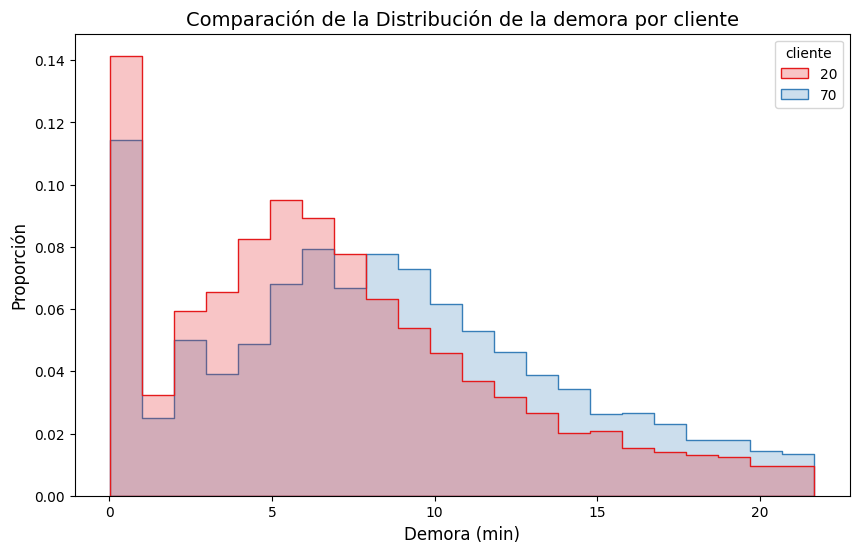

In [83]:
plt.figure(figsize=(10, 6))

# Calcular el número total de observaciones por cliente para normalizar
total_por_cliente = df_sin_outliers[df_sin_outliers['VisitaHora_Inicio'] != df_sin_outliers['VisitaHora_Fin']]['cliente'].value_counts()

# Usar histplot para las distribuciones de cada categoría, con pesos para calcular la proporción
sns.histplot(
    data=df_sin_outliers[df_sin_outliers['VisitaHora_Inicio'] != df_sin_outliers['VisitaHora_Fin']],
    x='Demora_Inicio_Fin', 
    hue='cliente', 
    element="step", 
    palette="Set1", 
    bins=22, 
    stat="density", 
    common_norm=False
)

# Títulos y etiquetas
plt.title('Comparación de la Distribución de la demora por cliente', fontsize=14)
plt.xlabel('Demora (min)', fontsize=12)
plt.ylabel('Proporción', fontsize=12)

plt.show()


In [15]:
print(len(df[df['Demora_Inicio_Fin']==0]))
print(len(df[df['Demora_Inicio_Fin']!=0]))

10251
17233


In [16]:
deciles = df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95])
print(deciles)
print(df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].mode())
print(df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].mean())
print(df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].median())

0.10     1.00
0.20     2.92
0.30     4.42
0.40     5.92
0.50     7.00
0.60     8.65
0.70    10.58
0.80    13.55
0.90    19.13
0.95    25.97
Name: Demora_Inicio_Fin, dtype: float64
0    1.0
Name: Demora_Inicio_Fin, dtype: float64
9.547540888190444
7.0


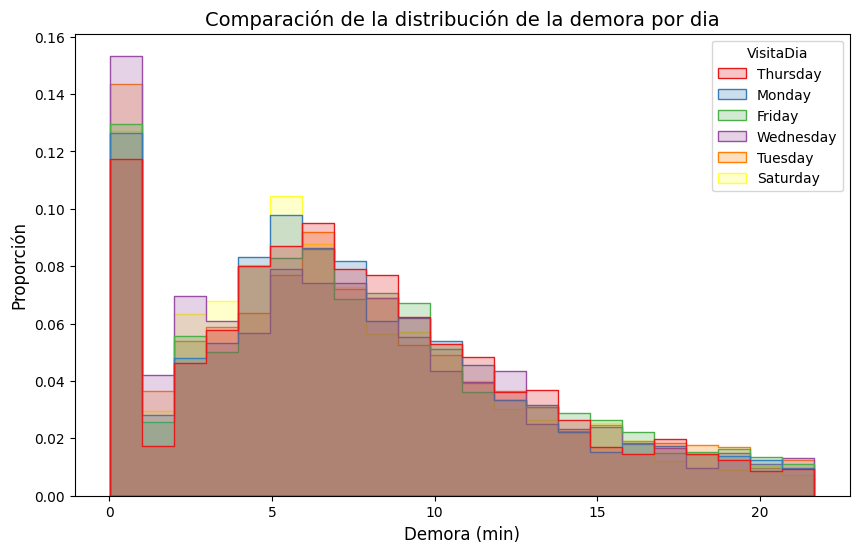

In [85]:
plt.figure(figsize=(10, 6))

# Calcular el número total de observaciones por cliente para normalizar
total_por_cliente = df_sin_outliers[df_sin_outliers['VisitaHora_Inicio'] != df_sin_outliers['VisitaHora_Fin']]['VisitaDia'].value_counts()

# Usar histplot para las distribuciones de cada categoría, con pesos para calcular la proporción
sns.histplot(
    data=df_sin_outliers[df_sin_outliers['VisitaHora_Inicio'] != df_sin_outliers['VisitaHora_Fin']],
    x='Demora_Inicio_Fin', 
    hue='VisitaDia', 
    element="step", 
    palette="Set1", 
    bins=22, 
    stat="density", 
    common_norm=False
)

# Títulos y etiquetas
plt.title('Comparación de la distribución de la demora por dia', fontsize=14)
plt.xlabel('Demora (min)', fontsize=12)
plt.ylabel('Proporción', fontsize=12)

plt.show()


In [90]:
df_sin_demora0 = df[df['Demora_Inicio_Fin']!=0]

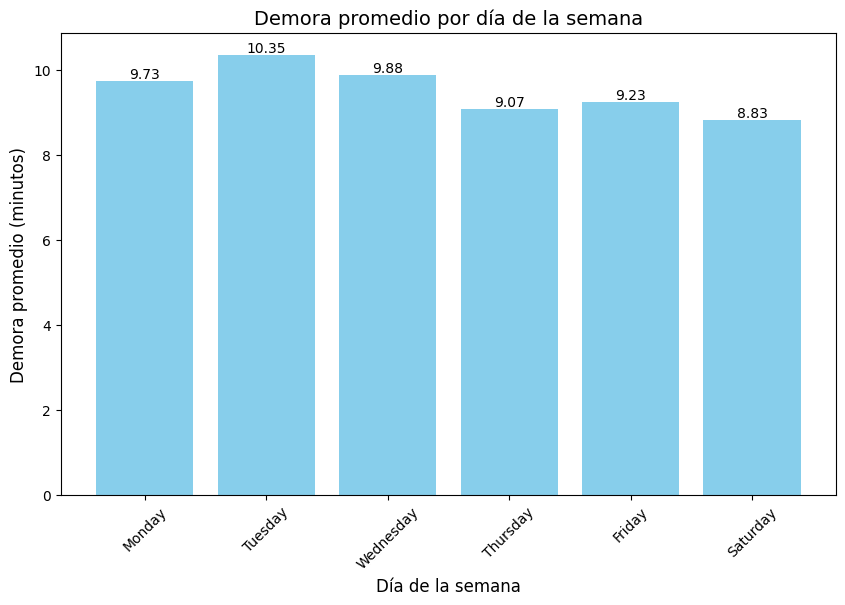

In [91]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
demora_promedio_por_dia = df_sin_demora0.groupby('VisitaDia')['Demora_Inicio_Fin'].mean().reindex(dias_semana)
plt.figure(figsize=(10, 6))
bars = plt.bar(demora_promedio_por_dia.index, demora_promedio_por_dia.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Agregar títulos y etiquetas
plt.title('Demora promedio por día de la semana', fontsize=14)
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Demora promedio (minutos)', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

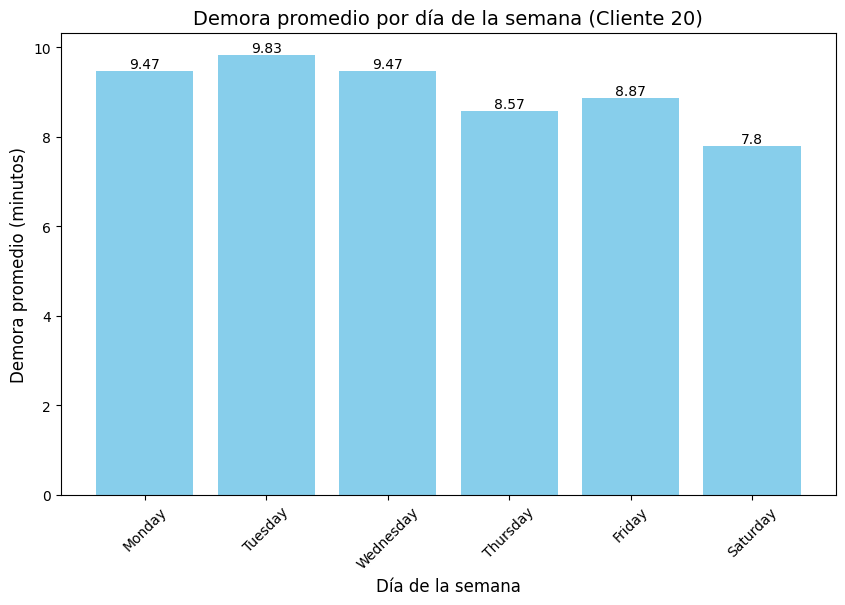

In [97]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
demora_promedio_por_dia = df_sin_demora0[df_sin_demora0['cliente']==20].groupby('VisitaDia')['Demora_Inicio_Fin'].mean().reindex(dias_semana)
plt.figure(figsize=(10, 6))
bars = plt.bar(demora_promedio_por_dia.index, demora_promedio_por_dia.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Agregar títulos y etiquetas
plt.title('Demora promedio por día de la semana (Cliente 20)', fontsize=14)
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Demora promedio (minutos)', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

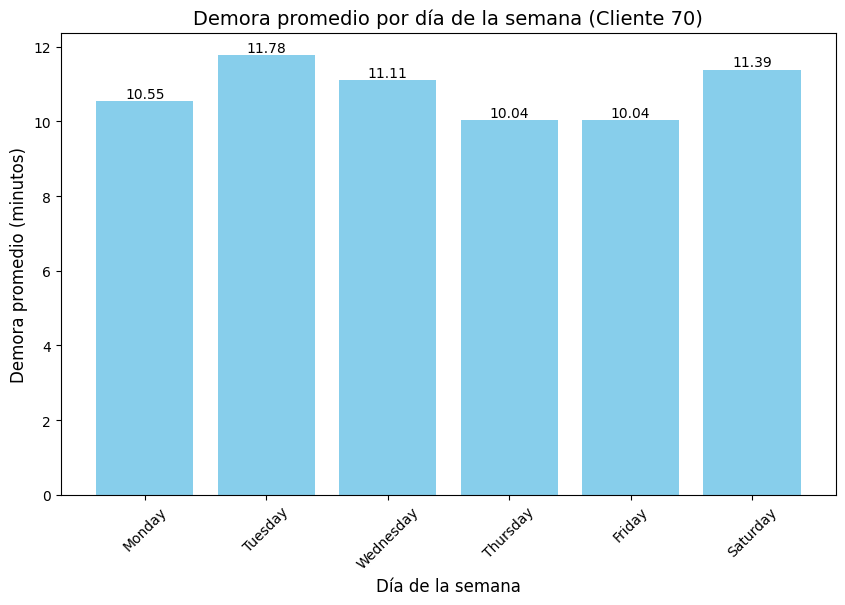

In [98]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
demora_promedio_por_dia = df_sin_demora0[df_sin_demora0['cliente']==70].groupby('VisitaDia')['Demora_Inicio_Fin'].mean().reindex(dias_semana)
plt.figure(figsize=(10, 6))
bars = plt.bar(demora_promedio_por_dia.index, demora_promedio_por_dia.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Agregar títulos y etiquetas
plt.title('Demora promedio por día de la semana (Cliente 70)', fontsize=14)
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Demora promedio (minutos)', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

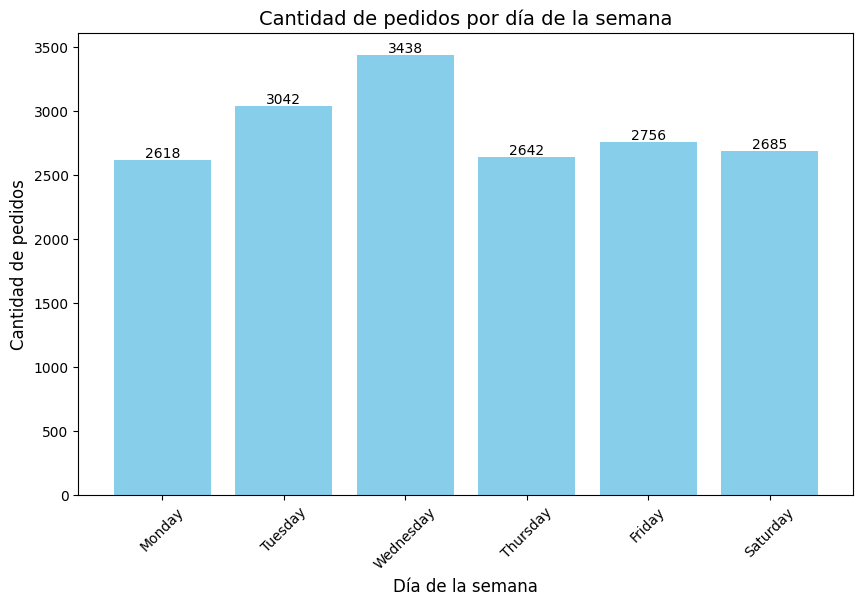

In [93]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cantidad_pedidos_por_dia = df_sin_demora0['VisitaDia'].value_counts().reindex(dias_semana)
plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_pedidos_por_dia.index, cantidad_pedidos_por_dia.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Agregar títulos y etiquetas
plt.title('Cantidad de pedidos por día de la semana', fontsize=14)
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Cantidad de pedidos', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

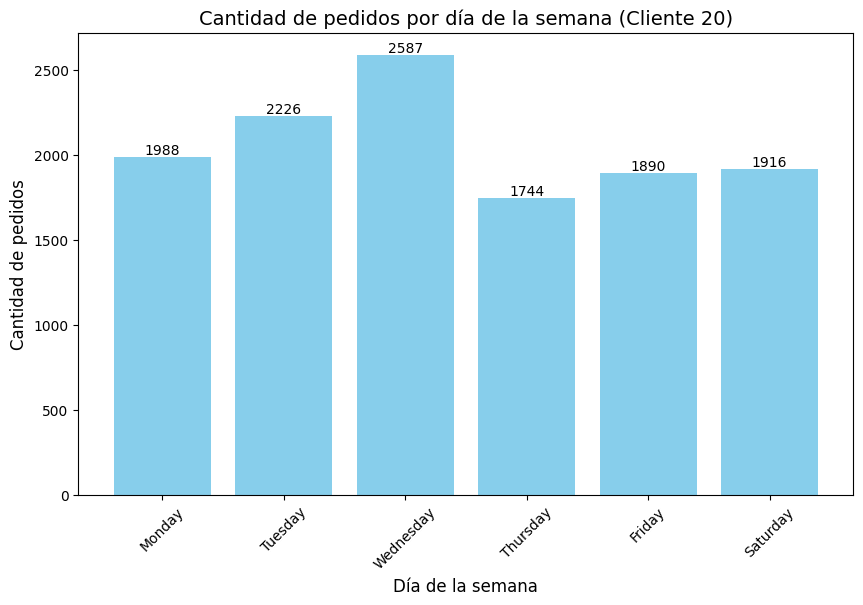

In [95]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cantidad_pedidos_por_dia = df_sin_demora0[df_sin_demora0['cliente']==20]['VisitaDia'].value_counts().reindex(dias_semana)
plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_pedidos_por_dia.index, cantidad_pedidos_por_dia.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Agregar títulos y etiquetas
plt.title('Cantidad de pedidos por día de la semana (Cliente 20)', fontsize=14)
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Cantidad de pedidos', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

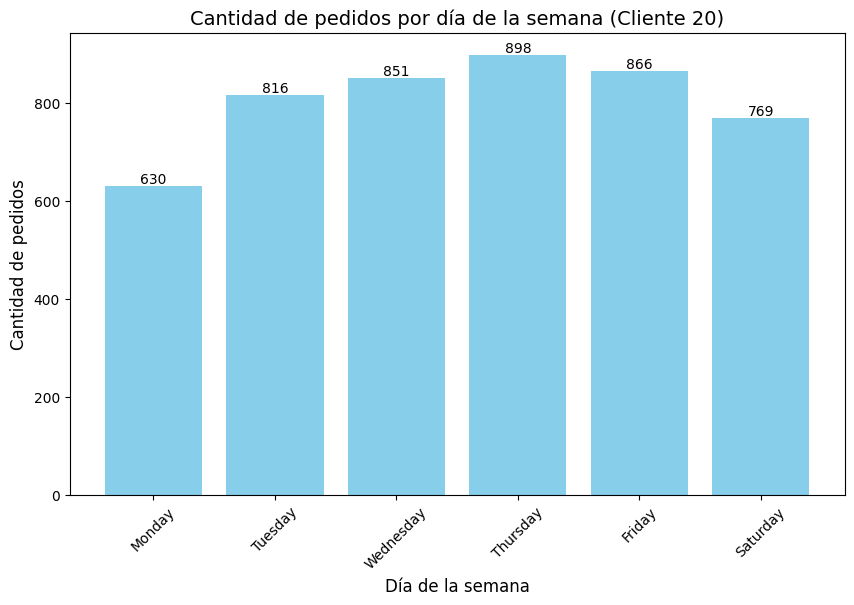

In [96]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cantidad_pedidos_por_dia = df_sin_demora0[df_sin_demora0['cliente']==70]['VisitaDia'].value_counts().reindex(dias_semana)
plt.figure(figsize=(10, 6))
bars = plt.bar(cantidad_pedidos_por_dia.index, cantidad_pedidos_por_dia.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Agregar títulos y etiquetas
plt.title('Cantidad de pedidos por día de la semana (Cliente 20)', fontsize=14)
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Cantidad de pedidos', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [116]:
round(df_sin_demora0.groupby('provincia')['Demora_Inicio_Fin'].mean().sort_values()*60,0)

provincia
Buenos Aires                       506.0
Ciudad Autónoma de Buenos Aires    579.0
Name: Demora_Inicio_Fin, dtype: float64

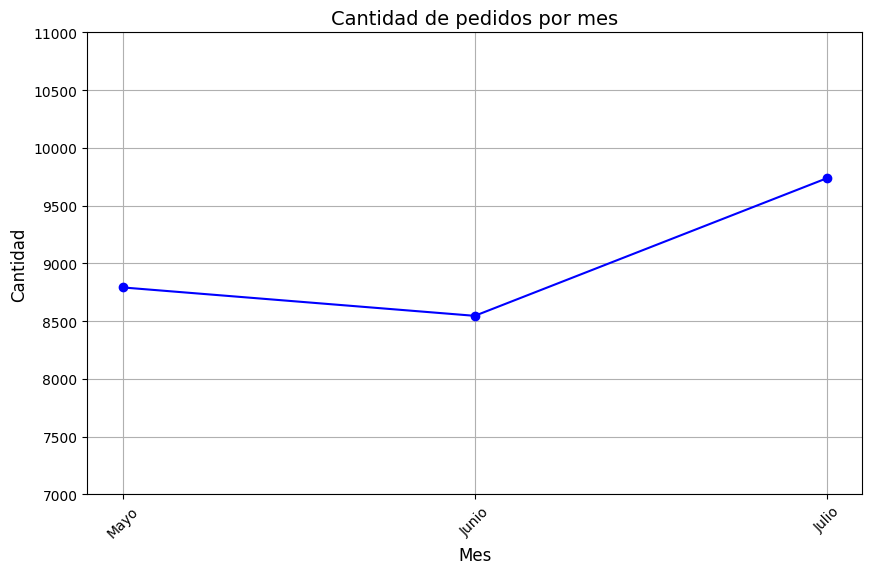

In [117]:
meses_orden = ['Mayo','Junio','Julio']
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(meses_orden, df['mes'].value_counts().reindex(meses_orden).values, marker='o', linestyle='-', color='b')

# Agregar títulos y etiquetas
plt.title('Cantidad de pedidos por mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

plt.ylim(7000,11_000)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid()  # Agregar una cuadrícula para mejor visualización
plt.show()

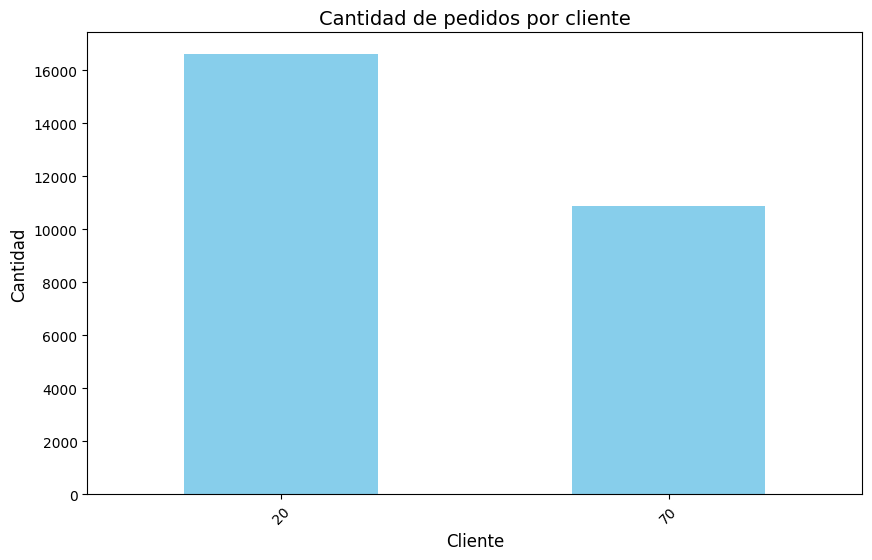

In [118]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
df.cliente.value_counts().plot(kind='bar', color='skyblue')

# Agregar títulos y etiquetas
plt.title('Cantidad de pedidos por cliente', fontsize=14)
plt.xlabel('Cliente', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()


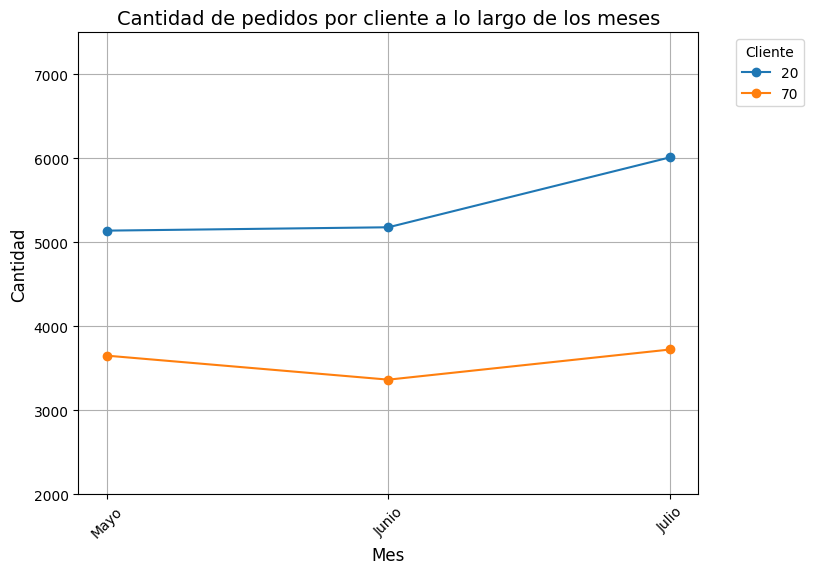

In [130]:
# Obtener el DataFrame con la cantidad de clientes por mes
clientes_por_mes = df.groupby('mes')['cliente'].value_counts().unstack().reindex(meses_orden)

# Crear el gráfico de líneas
plt.figure(figsize=(8, 6))
for cliente in clientes_por_mes.columns:
    plt.plot(clientes_por_mes.index, clientes_por_mes[cliente], marker='o', label=cliente)

# Agregar títulos y etiquetas
plt.title('Cantidad de pedidos por cliente a lo largo de los meses', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(2000,7500)

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid()  # Agregar una cuadrícula para mejor visualización
plt.show()


In [131]:
asd = df.VisitaFecha.value_counts().to_frame().reset_index().sort_values(by='index').reset_index(drop=True)
asd = asd.rename(columns={'index':'fecha'})
asd

,fecha,VisitaFecha
0,2024-05-03,351
1,2024-05-04,352
2,2024-05-06,316
3,2024-05-07,476
4,2024-05-08,484
...,...,...
73,2024-07-31,396
74,2024-08-01,342
75,2024-08-02,11
76,2024-08-05,2


In [58]:
asd.sort_values(by='VisitaFecha', ascending=False).head(10)

,fecha,VisitaFecha
15,2024-05-21,539
32,2024-06-11,485
4,2024-05-08,484
3,2024-05-07,476
54,2024-07-10,469
33,2024-06-12,461
34,2024-06-13,449
60,2024-07-17,447
43,2024-06-26,442
37,2024-06-18,442


In [31]:
asd.sort_values(by='VisitaFecha').head(10)
# agosto ??????
# 21/07 fue domingo
# 9 de mayo paro general
# 20 de junio dia de la bander (feriado)

,fecha,VisitaFecha
77,2024-08-06,1
5,2024-05-09,1
76,2024-08-05,2
64,2024-07-21,3
75,2024-08-02,11
39,2024-06-20,138
58,2024-07-15,280
46,2024-06-29,286
24,2024-06-01,289
25,2024-06-03,297


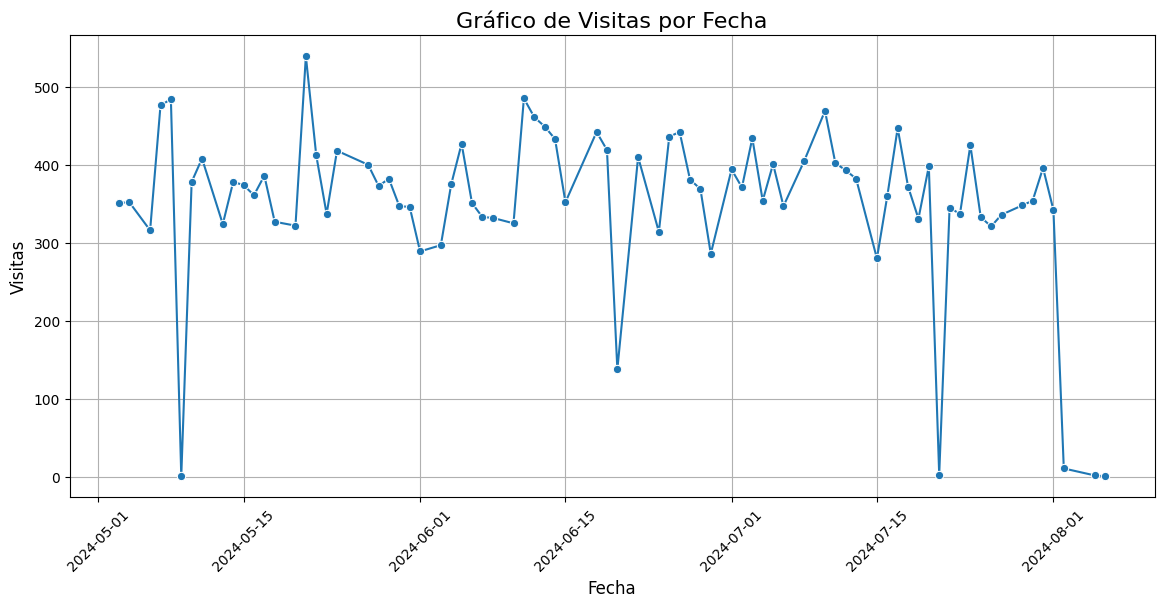

In [132]:
asd['fecha'] = pd.to_datetime(asd['fecha'])

# Crear el gráfico de líneas
plt.figure(figsize=(14,6))
sns.lineplot(x='fecha', y='VisitaFecha', data=asd, marker='o')

# Configuración del gráfico
plt.title('Gráfico de Visitas por Fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Visitas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [146]:
diferencia_planificada_df = df.copy()
diferencia_planificada_df['diferencia_planificada'] = pd.to_datetime(diferencia_planificada_df['VisitaFecha']) - pd.to_datetime(diferencia_planificada_df['VisitaPlanificadaFecha'])
diferencia_planificada_df[diferencia_planificada_df['diferencia_planificada']!= pd.Timedelta(0)].dropna().sort_values(by='diferencia_planificada',ascending=False)

,iddomicilioorden,direccion,provincia,municipio,localidad,InicioHorario1,FinHorario1,latitud,longitud,cliente,...,FinVisitaReal,VisitaPlanificadaFecha,VisitaPlanificadaDia,VisitaPlanificadaHora,VisitaFecha,VisitaDia,VisitaHora_Inicio,VisitaHora_Fin,Demora_Inicio_Fin,diferencia_planificada
26443,175957,BOYERO 1551,Buenos Aires,Malvinas Argentinas,Área de Promoción El Triángulo,901,1401,-34.456751,-58.709863,20,...,2024-05-09 11:22:00.000,2024-05-04,Saturday,12:01:00,2024-05-09,Thursday,11:22:00,11:22:00,0.00,5 days
1979,75526,BUCARELLI 943,Ciudad Autónoma de Buenos Aires,Comuna 15,Parque Chas,901,1401,-34.590183,-58.475405,20,...,2024-07-29 17:10:33.190,2024-07-25,Thursday,12:01:00,2024-07-29,Monday,17:10:33.190000,17:10:33.190000,0.00,4 days
27329,181175,SUAREZ 2761/60,Ciudad Autónoma de Buenos Aires,Comuna 4,Barracas,901,1401,-34.642925,-58.387706,20,...,2024-07-11 08:58:00.000,2024-07-08,Monday,13:12:00,2024-07-11,Thursday,08:58:00,08:58:00,0.00,3 days
26275,174665,BOLIVAR 1015,Ciudad Autónoma de Buenos Aires,Comuna 1,San Telmo,901,1401,-34.619769,-58.373015,20,...,2024-07-11 08:58:00.000,2024-07-08,Monday,13:01:00,2024-07-11,Thursday,08:58:00,08:58:00,0.00,3 days
26206,174425,ALVEAR 702,Buenos Aires,San Isidro,Martínez,901,1401,-34.485854,-58.493151,20,...,2024-07-11 08:58:00.000,2024-07-08,Monday,12:01:00,2024-07-11,Thursday,08:58:00,08:58:00,0.00,3 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10138,79510,BOEDO 873,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,901,1401,-34.623573,-58.416424,70,...,2024-07-20 12:26:17.000,2024-07-19,Friday,12:34:00,2024-07-20,Saturday,12:06:16,12:26:17,20.02,1 days
10239,79535,HUMBERTO PRIMO 3349,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,901,1401,-34.624026,-58.412938,70,...,2024-07-20 12:43:56.000,2024-07-19,Friday,12:36:00,2024-07-20,Saturday,12:29:12,12:43:56,14.73,1 days
18145,99060,JUJUY 457,Ciudad Autónoma de Buenos Aires,Comuna 3,Balvanera,901,1401,-34.615336,-58.404795,70,...,2024-06-27 15:39:57.000,2024-06-26,Wednesday,12:09:00,2024-06-27,Thursday,15:37:55,15:39:57,2.03,1 days
10480,79608,SANCHEZ DE LORIA 611 0,Ciudad Autónoma de Buenos Aires,Comuna 5,Boedo,901,1401,-34.616780,-58.412837,70,...,2024-06-27 14:54:28.000,2024-06-26,Wednesday,12:12:00,2024-06-27,Thursday,14:43:16,14:54:28,11.20,1 days


In [150]:
df['VisitaHora_Inicio_UNICO'] = df['InicioVisitaReal'].dt.hour
df[df['Demora_Inicio_Fin']!=0].groupby('VisitaHora_Inicio_UNICO').Demora_Inicio_Fin.mean()
df['VisitaHora_Inicio_UNICO'].value_counts()

15.0    5289
16.0    4727
14.0    4408
13.0    3644
12.0    3121
17.0    2185
11.0    2141
10.0     966
18.0     347
9.0      338
8.0      121
19.0      53
20.0      52
7.0       36
23.0       3
6.0        1
Name: VisitaHora_Inicio_UNICO, dtype: int64

In [156]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[df['Demora_Inicio_Fin'] != 0].groupby('VisitaHora_Inicio_UNICO')['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df['VisitaHora_Inicio_UNICO'].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['VisitaHora_Inicio_UNICO', 'Mean_Demora']
count_horas.columns = ['VisitaHora_Inicio_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_1 = pd.merge(mean_demora, count_horas, on='VisitaHora_Inicio_UNICO')

# Mostrar el resultado final
merged_df_1

,VisitaHora_Inicio_UNICO,Mean_Demora,Count
0,6.0,192.350000,1
1,7.0,13.586667,36
2,8.0,12.395603,121
3,9.0,15.523817,338
4,10.0,12.323282,966
5,11.0,11.360681,2141
6,12.0,10.007686,3121
7,13.0,8.940860,3644
8,14.0,8.666295,4408
9,15.0,8.176954,5289


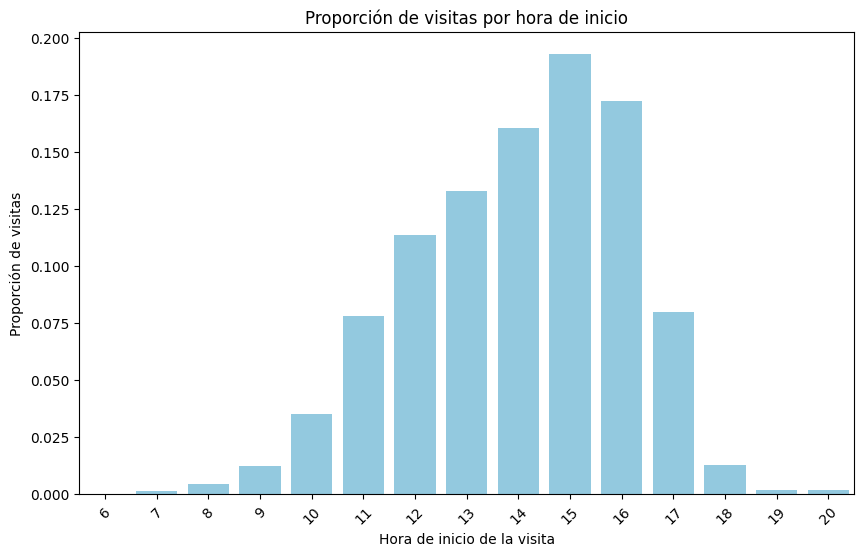

In [157]:
merged_df_1['Count'] = merged_df_1['Count'].div(merged_df_1['Count'].sum())
merged_df_1['VisitaHora_Inicio_UNICO'] = merged_df_1['VisitaHora_Inicio_UNICO'].astype(int)

# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Count', data=merged_df_1, color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Proporción de visitas')
plt.title('Proporción de visitas por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()


In [173]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[df['Demora_Inicio_Fin'] != 0].groupby(['cliente','VisitaHora_Inicio_UNICO'])['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[['cliente','VisitaHora_Inicio_UNICO']].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['cliente','VisitaHora_Inicio_UNICO', 'Mean_Demora']
count_horas.columns = ['cliente','VisitaHora_Inicio_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_11 = pd.merge(mean_demora, count_horas, on=['cliente','VisitaHora_Inicio_UNICO'])

# # Mostrar el resultado final
merged_df_11['Count'] = merged_df_11['Count'].div(merged_df_11['Count'].sum())
merged_df_11['VisitaHora_Inicio_UNICO'] = merged_df_11['VisitaHora_Inicio_UNICO'].astype(int)
merged_df_12 = merged_df_11.copy()
merged_df_12.loc[merged_df_12['cliente'] == 20, 'Count'] = merged_df_12.loc[merged_df_12['cliente'] == 20, 'Count'].div(merged_df_12.loc[merged_df_12['cliente'] == 20, 'Count'].sum())
merged_df_12.loc[merged_df_12['cliente'] == 70, 'Count'] = merged_df_12.loc[merged_df_12['cliente'] == 70, 'Count'].div(merged_df_12.loc[merged_df_12['cliente'] == 70, 'Count'].sum())
merged_df_12

,cliente,VisitaHora_Inicio_UNICO,Mean_Demora,Count
0,20,6,192.350000,0.000060
1,20,7,9.745600,0.001511
2,20,8,11.801264,0.005559
3,20,9,16.362429,0.014925
4,20,10,11.287041,0.045743
5,20,11,10.496350,0.093178
6,20,12,9.395735,0.131972
7,20,13,8.579134,0.155719
8,20,14,8.230377,0.166536
9,20,15,7.792629,0.161943


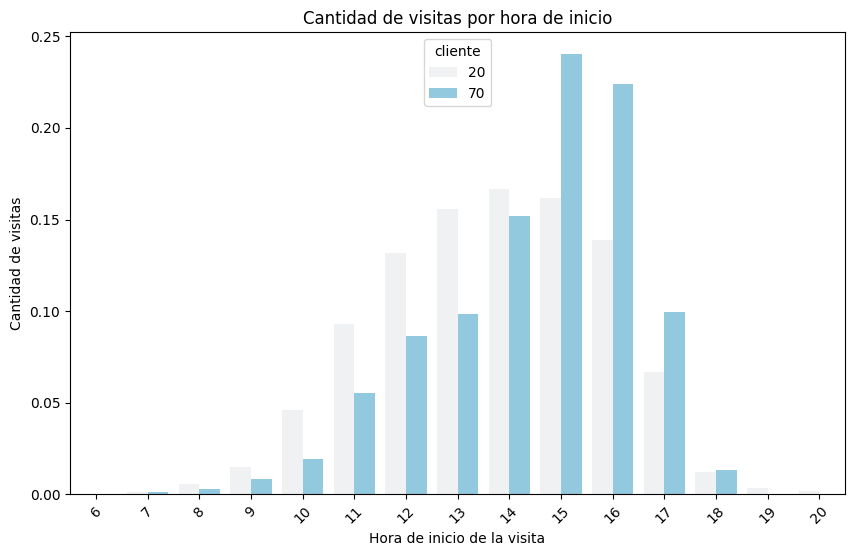

In [174]:
# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Count', hue='cliente', data=merged_df_12, color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Cantidad de visitas')
plt.title('Cantidad de visitas por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()

In [175]:
# SEGUIR ACAAAAA
df[['cliente','VisitaHora_Inicio_UNICO']].groupby(['cliente', 'VisitaHora_Inicio_UNICO']).value_counts().unstack().T

cliente,20,70
VisitaHora_Inicio_UNICO,,
6.0,1.0,NaN
7.0,25.0,11.0
8.0,92.0,29.0
9.0,247.0,91.0
10.0,757.0,209.0
11.0,1542.0,599.0
12.0,2184.0,937.0
13.0,2577.0,1067.0
14.0,2756.0,1652.0


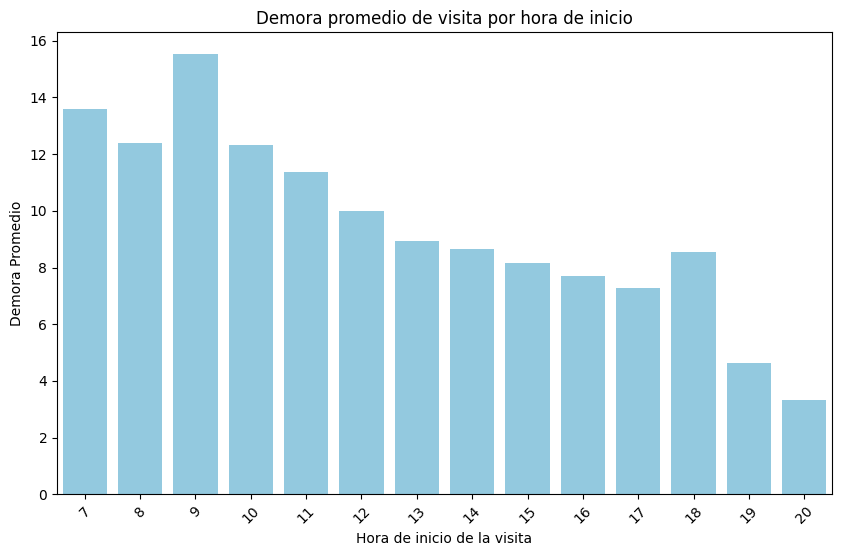

In [176]:
# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Mean_Demora', data=merged_df_1[1:], color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Demora Promedio')
plt.title('Demora promedio de visita por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostramos el gráfico
plt.show()


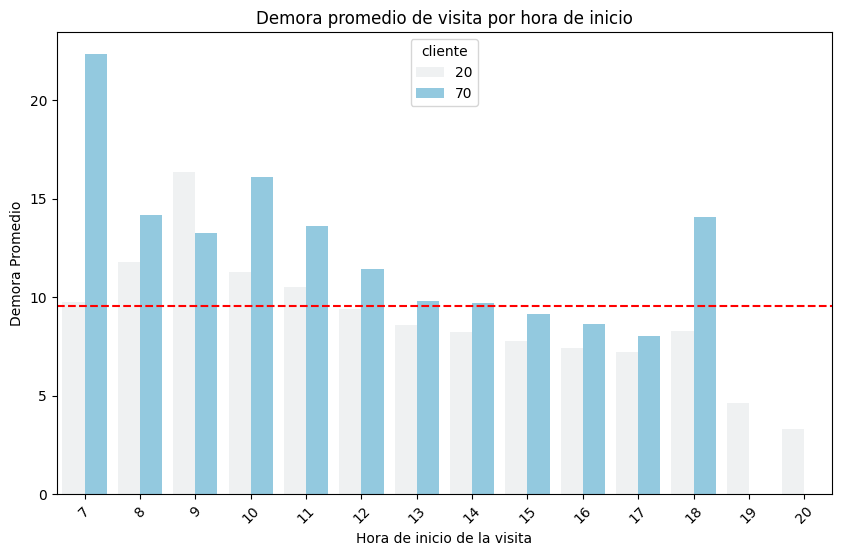

In [181]:
# Creamos el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='VisitaHora_Inicio_UNICO', y='Mean_Demora', hue='cliente', data=merged_df_11[1:], color='skyblue')

# Añadimos etiquetas y título
plt.xlabel('Hora de inicio de la visita')
plt.ylabel('Demora Promedio')
plt.title('Demora promedio de visita por hora de inicio')

# Rotamos las etiquetas del eje x si es necesario
plt.xticks(rotation=45)

plt.axhline(y=df[df['Demora_Inicio_Fin']!=0]['Demora_Inicio_Fin'].mean(), color='r', linestyle='--')

# Mostramos el gráfico
plt.show()


In [186]:
# Convertir la columna 'VisitaFecha' a formato datetime y extraer el día del mes
df['VisitaDia_UNICO'] = pd.to_datetime(df['VisitaFecha']).dt.day

# Clasificar los días del mes en semanas (1-7: primera semana, 8-14: segunda semana, etc.)
df['SemanaDelMes'] = pd.cut(df['VisitaDia_UNICO'], bins=[0, 7, 14, 21, 28], labels=['primera', 'segunda', 'tercera', 'cuarta'], right=False)

# Contar la cantidad de pedidos por semana del mes, excluyendo los valores de 'Demora_Inicio_Fin' que sean 0
pedidos_por_semana = df[df['Demora_Inicio_Fin'] != 0].groupby('SemanaDelMes').size().reset_index(name='Cantidad de pedidos')

# Mostrar el DataFrame con la cantidad de pedidos por semana
pedidos_por_semana

,SemanaDelMes,Cantidad de pedidos
0,primera,3409
1,segunda,4025
2,tercera,3916
3,cuarta,3888


In [40]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[df['Demora_Inicio_Fin'] != 0].groupby('VisitaDia_UNICO')['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[df['Demora_Inicio_Fin'] != 0]['VisitaDia_UNICO'].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['VisitaDia_UNICO', 'Mean_Demora']
count_horas.columns = ['VisitaDia_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_2 = pd.merge(mean_demora, count_horas, on='VisitaDia_UNICO')

# Mostrar el resultado final
merged_df_2

,VisitaDia_UNICO,Mean_Demora,Count
0,1.0,9.854038,629
1,2.0,9.902125,240
2,3.0,10.274024,661
3,4.0,9.978955,689
4,5.0,9.359256,524
5,6.0,9.002492,666
6,7.0,9.258604,444
7,8.0,9.886320,826
8,10.0,9.481367,746
9,11.0,9.340090,781


In [41]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[(df['Demora_Inicio_Fin'] != 0) & (df['cliente'] == 20)].groupby('VisitaDia_UNICO')['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[(df['Demora_Inicio_Fin'] != 0) & (df['cliente'] == 20)]['VisitaDia_UNICO'].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['VisitaDia_UNICO', 'Mean_Demora']
count_horas.columns = ['VisitaDia_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_2 = pd.merge(mean_demora, count_horas, on='VisitaDia_UNICO')

# Mostrar el resultado final
merged_df_2

,VisitaDia_UNICO,Mean_Demora,Count
0,1.0,8.674788,449
1,2.0,9.950323,155
2,3.0,9.595289,467
3,4.0,9.450086,466
4,5.0,9.238997,369
5,6.0,7.958612,425
6,7.0,9.463484,287
7,8.0,9.581463,629
8,10.0,9.007758,513
9,11.0,9.000769,598


In [42]:
# Calcular la media de 'Demora_Inicio_Fin' agrupada por 'VisitaHora_Inicio_UNICO'
mean_demora = df[(df['Demora_Inicio_Fin'] != 0) & (df['cliente'] == 70)].groupby('VisitaDia_UNICO')['Demora_Inicio_Fin'].mean().reset_index()

# Contar las ocurrencias de 'VisitaHora_Inicio_UNICO'
count_horas = df[(df['Demora_Inicio_Fin'] != 0) & (df['cliente'] == 70)]['VisitaDia_UNICO'].value_counts().reset_index()

# Renombrar las columnas para que el merge sea más claro
mean_demora.columns = ['VisitaDia_UNICO', 'Mean_Demora']
count_horas.columns = ['VisitaDia_UNICO', 'Count']

# Realizar el merge entre ambos DataFrames usando la columna común 'VisitaHora_Inicio_UNICO'
merged_df_2 = pd.merge(mean_demora, count_horas, on='VisitaDia_UNICO')

# Mostrar el resultado final
merged_df_2

,VisitaDia_UNICO,Mean_Demora,Count
0,1.0,12.795611,180
1,2.0,9.814235,85
2,3.0,11.907887,194
3,4.0,11.084126,223
4,5.0,9.645548,155
5,6.0,10.843361,241
6,7.0,8.884076,157
7,8.0,10.859695,197
8,10.0,10.524120,233
9,11.0,10.448907,183


In [46]:
df.localidad.value_counts().head(10)

Palermo         1938
Recoleta        1846
Belgrano        1365
Balvanera       1295
Almagro         1176
Caballito       1083
Villa Crespo     991
Flores           979
San Nicolás      960
Colegiales       885
Name: localidad, dtype: int64

In [188]:
df.localidad.value_counts().tail(16).sort_values()

La Plata                          1
Banfield                          1
Guillermo Enrique Hudson          1
Ricardo Rojas                     1
Ingeniero Maschwitz               1
Área de Promoción El Triángulo    1
Pilar                             1
Ingeniero Adolfo Sourdeaux        1
Villa Maipú                       1
Piñeyro                           1
Villa Luzuriaga                   1
San Miguel                        2
Garín                             2
Santos Lugares                    2
Don Torcuato Este                 3
Rincón de Milberg                 4
Name: localidad, dtype: int64

In [56]:
df.groupby('cliente').localidad.value_counts().unstack().T.sort_values(by=20, ascending=False).head(15)

cliente,20,70
localidad,,
Palermo,1252.0,686.0
Recoleta,1205.0,641.0
Balvanera,913.0,382.0
Belgrano,855.0,510.0
San Nicolás,762.0,198.0
Almagro,701.0,475.0
Retiro,683.0,156.0
Villa Crespo,632.0,359.0
Caballito,554.0,529.0


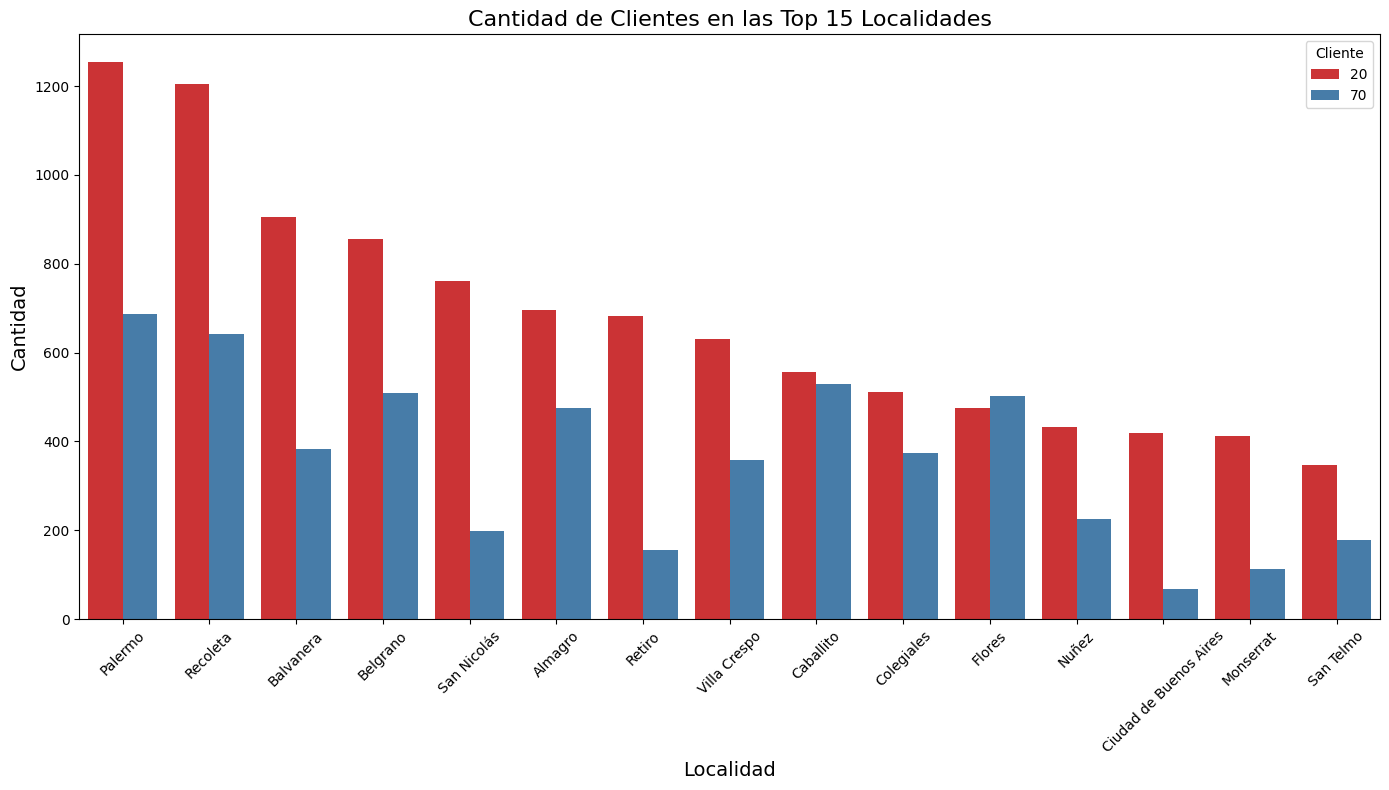

In [190]:
# Obtener los datos de las 15 localidades más comunes, divididas por cliente
top_localidades = df.groupby('cliente').localidad.value_counts().unstack().T.sort_values(by=20, ascending=False).head(15).stack().reset_index()
top_localidades.columns = ['Localidad', 'Cliente', 'Cantidad']

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=top_localidades, x='Localidad', y='Cantidad', hue='Cliente', palette='Set1')

# Añadir etiquetas y título
plt.title('Cantidad de Clientes en las Top 15 Localidades', fontsize=16)
plt.xlabel('Localidad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend(title='Cliente')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


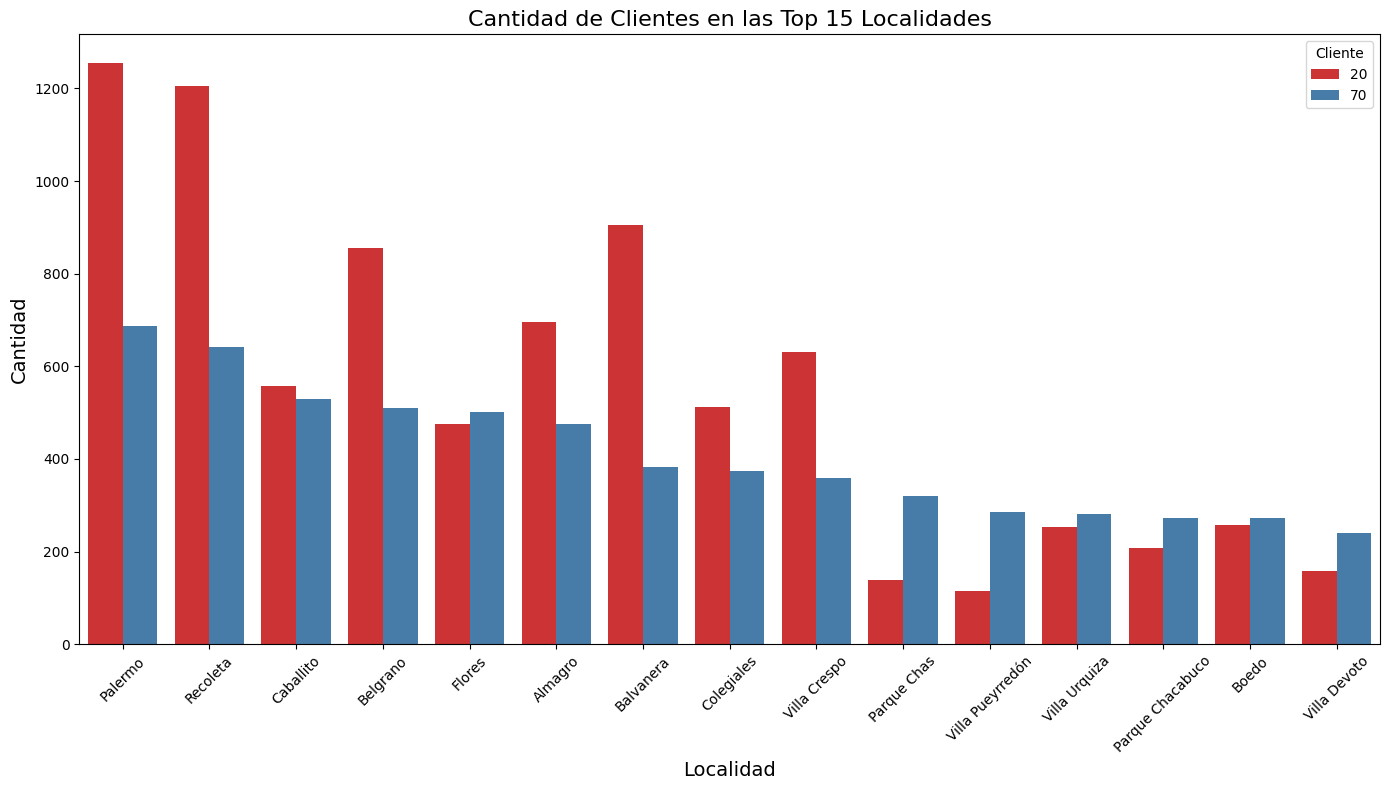

In [191]:
# Obtener los datos de las 15 localidades más comunes, divididas por cliente
top_localidades = df.groupby('cliente').localidad.value_counts().unstack().T.sort_values(by=70, ascending=False).head(15).stack().reset_index()
top_localidades.columns = ['Localidad', 'Cliente', 'Cantidad']

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=top_localidades, x='Localidad', y='Cantidad', hue='Cliente', palette='Set1')

# Añadir etiquetas y título
plt.title('Cantidad de Clientes en las Top 15 Localidades', fontsize=16)
plt.xlabel('Localidad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend(title='Cliente')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()
